In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns", None) # unlimited columns

In [4]:
submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
original = pd.read_csv("original.csv")

In [5]:
train['Dataset'] = "train"
test['Dataset'] = "test"
original['Dataset'] = "original"

original.rename(columns={"Gender": "Sex"}, inplace=True) # rename Gender to Sex
original.rename(columns={"User_ID": "id"}, inplace=True) # rename User_ID to id

In [6]:
submission.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [7]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train


In [8]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Dataset
0,750000,male,45,177.0,81.0,7.0,87.0,39.8,test
1,750001,male,26,200.0,97.0,20.0,101.0,40.5,test
2,750002,female,29,188.0,85.0,16.0,102.0,40.4,test
3,750003,female,39,172.0,73.0,20.0,107.0,40.6,test
4,750004,female,30,173.0,67.0,16.0,94.0,40.5,test


In [9]:
original.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,original
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,original
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,original
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,original
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,original


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
 9   Dataset     750000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 57.2+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
 8   Dataset     250000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 17.2+ MB


In [12]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15000 non-null  int64  
 1   Sex         15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
 9   Dataset     15000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


In [13]:
df = pd.concat([train, test, original])
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Dataset
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,train
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,train
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,train
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,train
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,train
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,original
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,original
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,original
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,original


Leave no stone unturned

**Check categorical distribution**

<Axes: xlabel='Sex', ylabel='count'>

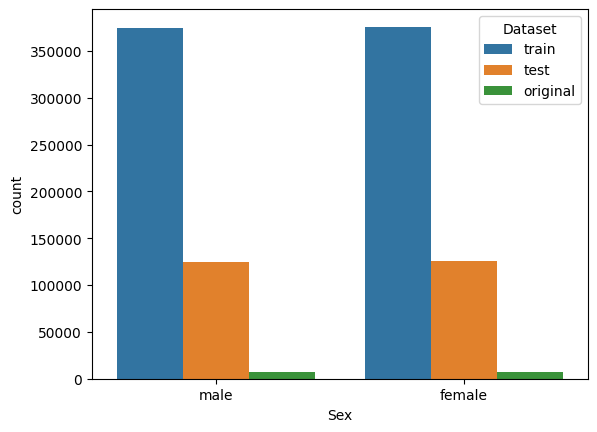

In [14]:
sns.countplot(df, x="Sex", hue="Dataset")

Same sex distribution for every dataset. **Check numerical distribution**. No nans in the dataset.

<Axes: xlabel='Age'>

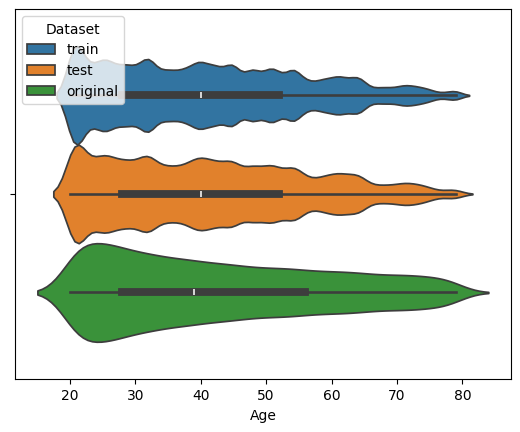

In [15]:
sns.violinplot(df, x="Age", hue="Dataset")

<Axes: xlabel='Age', ylabel='count'>

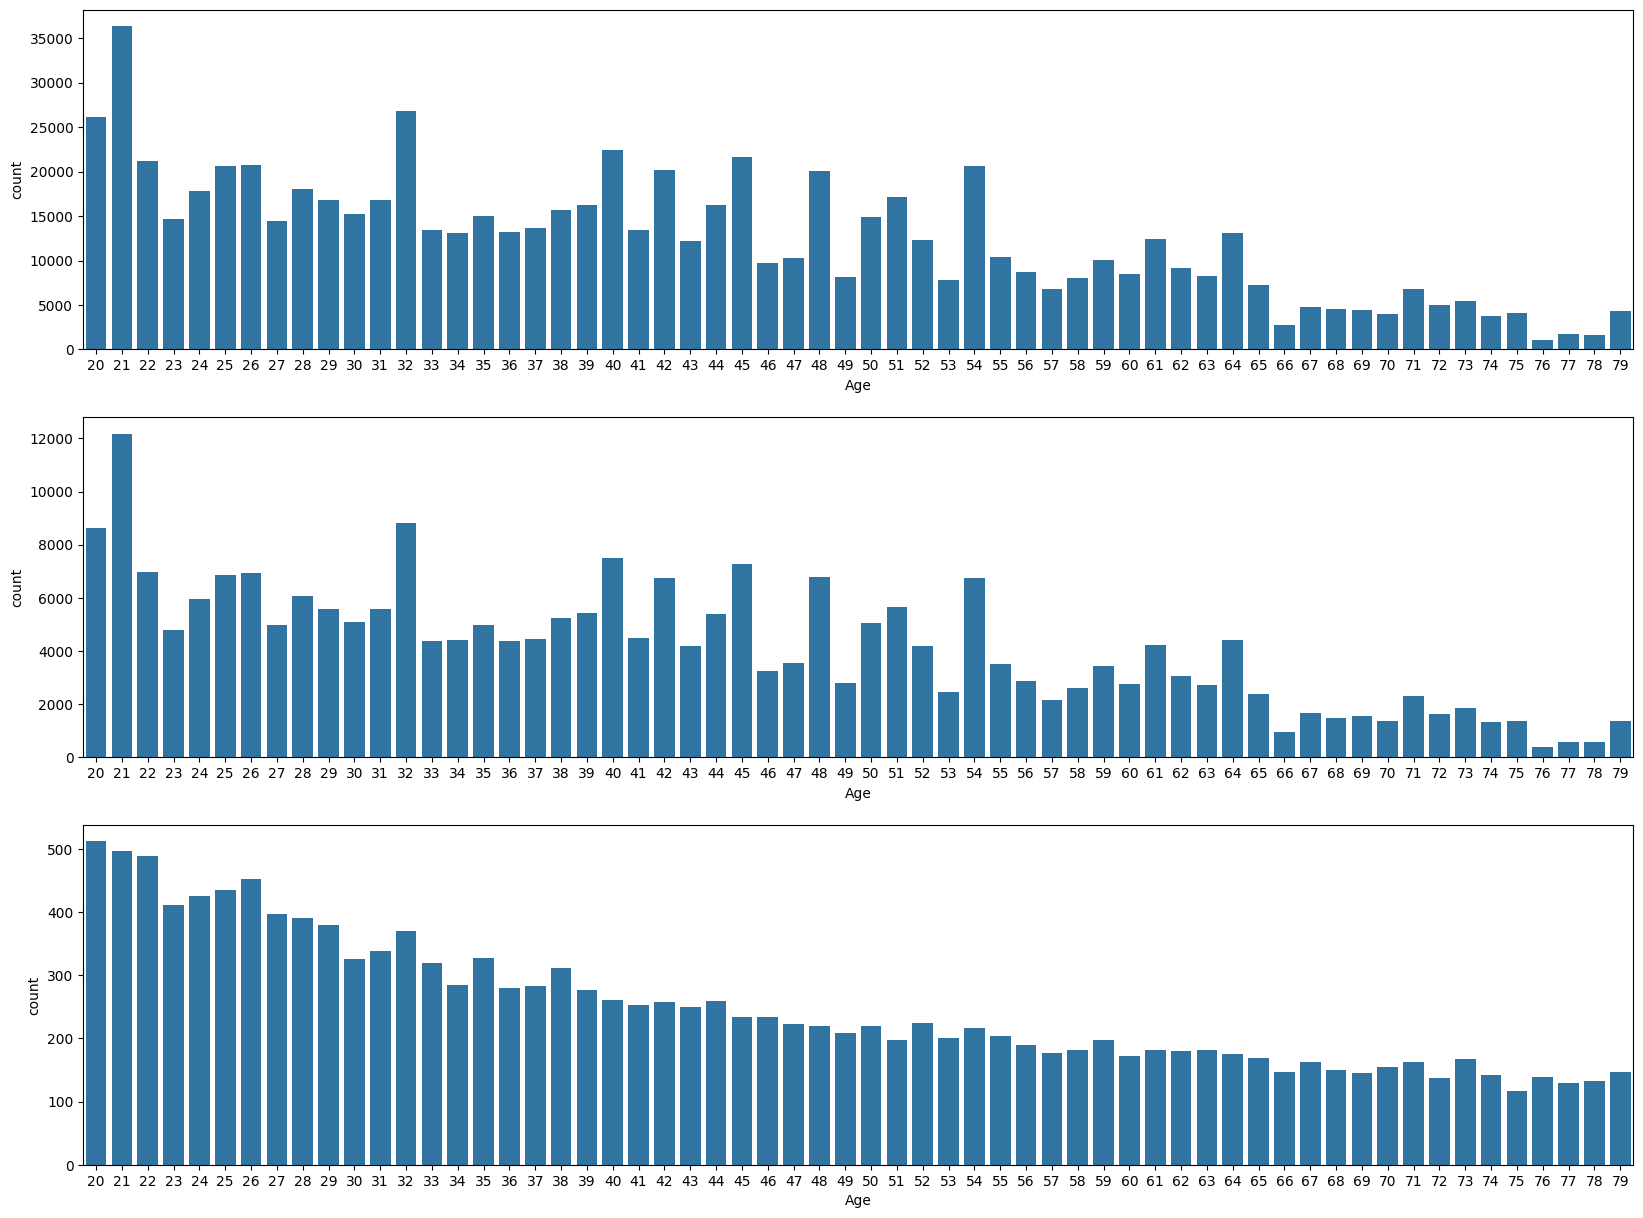

In [40]:
fig, axes = plt.subplots(3,1,figsize=(20,15))

sns.countplot(train, x="Age",ax=axes[0])
sns.countplot(test, x="Age",ax=axes[1])
sns.countplot(original, x="Age",ax=axes[2])

Original distribution for Age seems more uniform than both train and test. train and test look very similar so most likely sampled from the same distribution.